# Lab 1: Sentiment Classification as a Machine Learning Model

### Introduction

In this lab session we will go through a typical NLP task: we will build a text classification problem. 

We will learn how to:
- read  data from Google Drive
- how to preprocess data
- training a classification problem with hyperparameters
- understand and analyze the output of the model
- understand strengths and weaknesses of this approach


#### Dataset


We will read a dataset containing sentences and their polarity
and run a classification algorithm for __sentence classification__ using sklearn. 

Given a sentence, our model will predict if it is a positive or negative piece of texts. The dataset we are going to use ranges the polarity annotation from 0 to 5, where 0 denotes extremely negative sentiment,  and 5  is the most  positive. For this lab we'll  simplify the task, and we will translate the 5-way classification task into 2-way classification task, (0 $\rightarrow$ _negative,_ ;1 $\rightarrow$ positive)

In [0]:
# Libraries
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 1. Loading the data

Let's load the Stanford Sentiment Treebank. The data can be originaly downloaded from here: [the train/dev/test Stanford Sentiment Treebank distribution](http://nlp.stanford.edu/sentiment/trainDevTestTrees_PTB.zip). This will download a folder, `tree` containing three files: `train.txt`, `dev.txt` and `test.txt`, representing data for train, validation and test respectively. 

Once you have downloaded the file, you should upload the extracted folder inside a `data` folder in Google Drive. 

This should be your Google Drive working directory:
```
  your_folder/
        01_Text_Classification.ipynb
        02_...
        ...
        data/
          trees/
          trees/train.txt
          trees/dev.txt
          trees/test.txt
```

In order to load the data,  you'll need to mount your Drive folder first and give the access to the Notebook. This will require one-step authentication. Please when you run the cell below follow the instructions.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Once you mount everything, make sure you set the variable `sst_home` correctly. 


In [0]:
sst_home = 'drive/My Drive/kschool-nlp/data/trees/'

In [4]:
# Load the data


# Let's do 2-way positive/negative classification instead of 5-way    
def load_sst_data(path,
                  easy_label_map={0:0, 1:0, 2:None, 3:1, 4:1}):
    data = []
    with open(path) as f:
        for i, line in enumerate(f):
            example = {}
            example['label'] = easy_label_map[int(line[1])]
            if example['label'] is None:
                continue
            
            # Strip out the parse information and the phrase labels---we don't need those here
            text = re.sub(r'\s*(\(\d)|(\))\s*', '', line)
            example['text'] = text[1:]
            data.append(example)
            
            
            # print one line of the file:
            if i==1:
              print('Example line:')
              print(len(line))
              print(line)
              print(example['text'])
              
    data = pd.DataFrame(data)
    return data

  
training_set = load_sst_data(sst_home + 'train.txt')
dev_set = load_sst_data(sst_home + 'dev.txt')
test_set = load_sst_data(sst_home + 'test.txt')

print('Training size: {}'.format(len(training_set)))
print('Dev size: {}'.format(len(dev_set)))
print('Test size: {}'.format(len(test_set)))

Example line:
520
(4 (4 (4 (2 The) (4 (3 gorgeously) (3 (2 elaborate) (2 continuation)))) (2 (2 (2 of) (2 ``)) (2 (2 The) (2 (2 (2 Lord) (2 (2 of) (2 (2 the) (2 Rings)))) (2 (2 '') (2 trilogy)))))) (2 (3 (2 (2 is) (2 (2 so) (2 huge))) (2 (2 that) (3 (2 (2 (2 a) (2 column)) (2 (2 of) (2 words))) (2 (2 (2 (2 can) (1 not)) (3 adequately)) (2 (2 describe) (2 (3 (2 (2 co-writer\/director) (2 (2 Peter) (3 (2 Jackson) (2 's)))) (3 (2 expanded) (2 vision))) (2 (2 of) (2 (2 (2 J.R.R.) (2 (2 Tolkien) (2 's))) (2 Middle-earth))))))))) (2 .)))

The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
Example line:
254
(3 (3 (2 If) (3 (2 you) (3 (2 sometimes) (2 (2 like) (3 (2 to) (3 (3 (2 go) (2 (2 to) (2 (2 the) (2 movies)))) (3 (2 to) (3 (2 have) (4 fun))))))))) (2 (2 ,) (2 (2 Wasabi) (3 (3 (2 is) (2 (2 a) (2 (3 good) (2 (2 pla

## 2. Exploring the data

Let's understand our data:

In [5]:
# Examples of negative sentences
training_set[training_set.label == 0].head(10)

,label,text
22,0,This is n't a new idea .
34,0,... a sour little movie at its core ; an explo...
37,0,Made me unintentionally famous -- as the queas...
52,0,The modern-day royals have nothing on these gu...
53,0,It 's only in fairy tales that princesses that...
59,0,An absurdist spider web .
76,0,By no means a slam-dunk and sure to ultimately...
110,0,It 's not a great monster movie .
144,0,"Too often , Son of the Bride becomes an exerci..."
148,0,A party-hearty teen flick that scalds like acid .


In [6]:
# Examples of positive sentences
training_set[training_set.label == 1].head(10)

,label,text
0,1,The Rock is destined to be the 21st Century 's...
1,1,The gorgeously elaborate continuation of `` Th...
2,1,Singer\/composer Bryan Adams contributes a sle...
3,1,Yet the act is still charming here .
4,1,Whether or not you 're enlightened by any of D...
5,1,Just the labour involved in creating the layer...
6,1,Part of the charm of Satin Rouge is that it av...
7,1,a screenplay more ingeniously constructed than...
8,1,`` Extreme Ops '' exceeds expectations .
9,1,"Good fun , good action , good acting , good di..."


In [7]:
# Volumen of each class
# Approximately, our dataset is balanced
training_set.groupby('label').size().reset_index(name='n')

,label,n
0,0,3310
1,1,3610




---


## Before we make things complicated:

Now we are going to run our first model with a standard setup. Later in the session we will test different preprocessing or parameters

In [8]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
from nltk import word_tokenize

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_auc_score, precision_recall_curve, roc_curve

In [0]:
pipeline = Pipeline([
    ('cvc', CountVectorizer(tokenizer = word_tokenize, max_features=5000)),
    ('clf', MultinomialNB())
])

In [0]:
# Fit the model to our training data
model = pipeline.fit(X=training_set.text, y=training_set.label)

In [0]:
# Predict label on validation and test sets
dev_set['pred'] = model.predict(dev_set.text)
test_set['pred'] = model.predict(test_set.text)

In [13]:
dev_set.head()

,label,text,pred
0,1,It 's a lovely film with lovely performances b...,1
1,1,And if you 're not nearly moved to tears by a ...,1
2,1,"A warm , funny , engaging film .",1
3,1,Uses sharp humor and insight into human nature...,1
4,1,"Entertains by providing good , lively company .",1


In [14]:
print('Accuracy: {}'.format(accuracy_score(dev_set.label, dev_set.pred)))
print('Precision: {}'.format(precision_score(dev_set.label, dev_set.pred)))
print('Recall: {}'.format(recall_score(dev_set.label, dev_set.pred)))
print('ROC-AUC: {}'.format(roc_auc_score(dev_set.label, dev_set.pred)))

Accuracy: 0.7889908256880734
Precision: 0.7981651376146789
Recall: 0.7837837837837838
ROC-AUC: 0.7890881535741349


In [15]:
# Predict probability on validation and test sets
dev_set['prob'] = model.predict_proba(dev_set.text)[:,1]
test_set['prob'] = model.predict_proba(test_set.text)[:,1]

dev_set.head()

,label,text,pred,prob
0,1,It 's a lovely film with lovely performances b...,1,0.933416
1,1,And if you 're not nearly moved to tears by a ...,1,0.910736
2,1,"A warm , funny , engaging film .",1,0.992550
3,1,Uses sharp humor and insight into human nature...,1,0.999921
4,1,"Entertains by providing good , lively company .",1,0.932360


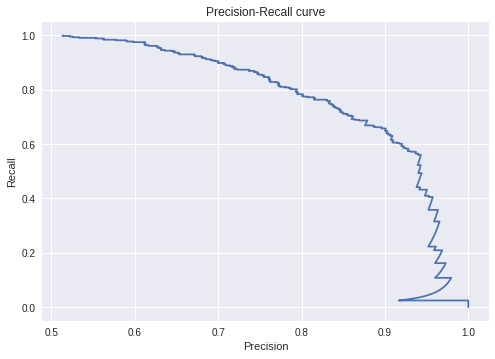

In [16]:
prec, rec, _ = precision_recall_curve(dev_set.label, dev_set.prob)
plt.plot(prec, rec);
plt.title('Precision-Recall curve');
plt.xlabel('Precision');
plt.ylabel('Recall');

AUC: 0.8763629283489097


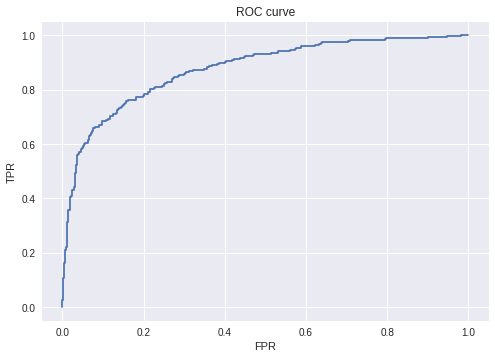

In [17]:
#help(roc_curve)

fpr, tpr, thresholds = roc_curve(dev_set.label, dev_set.prob)
print('AUC: {}'.format(auc(fpr, tpr)))

plt.plot(fpr, tpr);
plt.title('ROC curve');
plt.xlabel('FPR');
plt.ylabel('TPR');

Ok, so we have built our first classifier and it is actually very good!

Now let's move into understanding the outcome, how the model is working and how we can test for other preprocessing or parameters tunning and so on. 

*** Feature importance ***

Let's analyze what are the most important word for predicting positive and negative labels. To do so, we select the **classifier** step from the Pipeline and take the coefficients. 



In [0]:
preprocess = model.named_steps['cvc']
classifier = model.named_steps['clf']

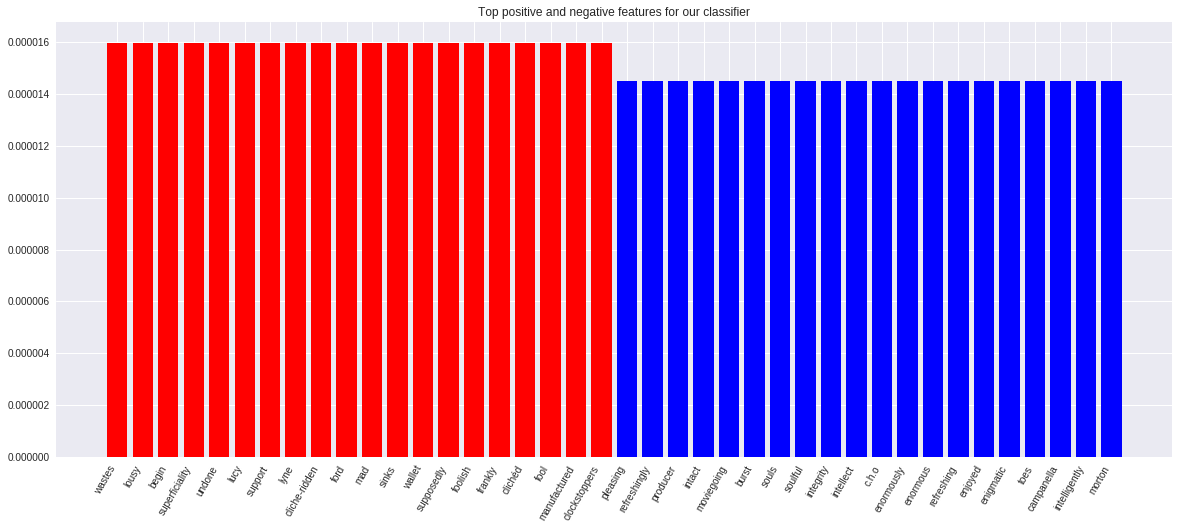

In [25]:
coef_positive = classifier.feature_log_prob_[0]
coef_negative = classifier.feature_log_prob_[1]

feature_names = preprocess.get_feature_names()

top_features = 20


top_positive_coefficients = np.argsort(coef_positive)[:top_features]
top_negative_coefficients = np.argsort(coef_negative)[:top_features]

coefficients = np.hstack([coef_positive[top_positive_coefficients], coef_negative[top_negative_coefficients]])
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

# create plot
plt.figure(figsize=(20, 8))
colors = ['red' if i in top_negative_coefficients else 'blue' for i in top_coefficients]
plt.bar(np.arange(2 * top_features), np.exp(coefficients), color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.title('Top positive and negative features for our classifier')
plt.show()

**Analyze feature importance:**

We observe that words that have a high probability $P(x_i|Y=y)$ for each class $y$ are, in general, what we would expect. 

Let's create a function so that we can use it later with other classifiers.

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_coefficients(classifier, feature_names, top_features=20, figsize=(20, 8)):
    
    #if isinstance(coef, np.ndarray):
    #    coef = coef[0]
    #else:
    #    coef = np.ravel(coef.todense())
    

    top_positive_coefficients = np.argsort(coef_positive)[:top_features]
    top_negative_coefficients = np.argsort(coef_negative)[:top_features]

    coefficients = np.hstack([coef_positive[top_positive_coefficients], coef_negative[top_negative_coefficients]])
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

    # create plot
    plt.figure(figsize=(20, 8))
    colors = ['red' if i in top_negative_coefficients else 'blue' for i in top_coefficients]
    plt.bar(np.arange(2 * top_features), np.exp(coefficients), color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title('Top positive and negative features for our classifier')
    plt.show()



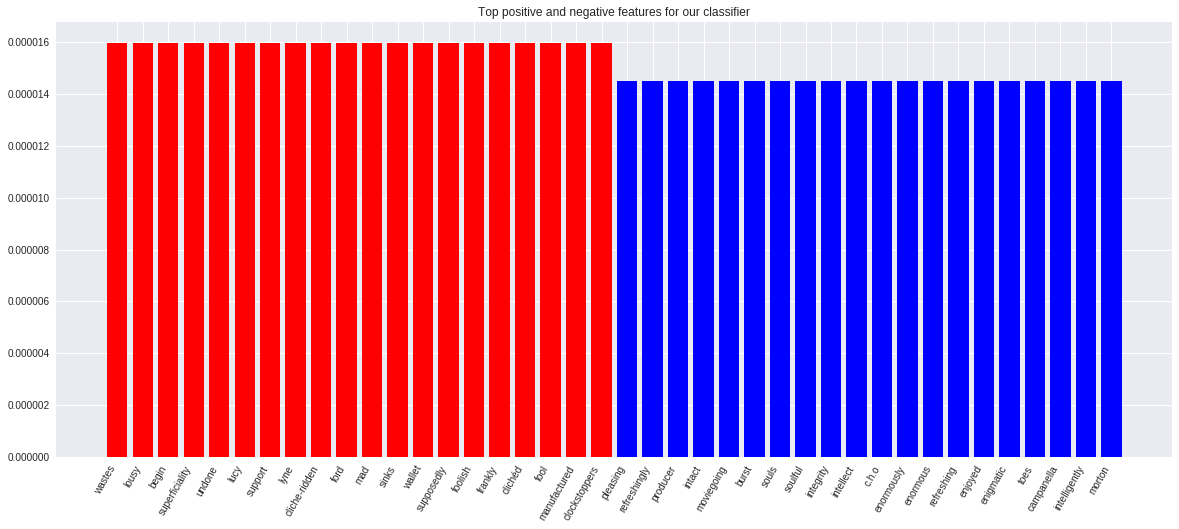

In [27]:
plot_coefficients(classifier, preprocess.get_feature_names(), figsize=(10,5))

Ok, now, let's go back to the data preprocessing and after you will play with different 
- preprocessing options, 
- models
- model hyperparameters



---



## 3. Preprocessing the data
Once data is loaded the next step is to preprocess it to obtain the vectorized form i.e. the process of transforming text into feature vectors.

**Here it is where our work as Data Scientists start!!**

Essentially, for the moment, we will do:
- Tokenization, tipically segment the text into words.
- Removing stopwords (next subsection)
- Lemmatization (next subsection)
- Definition of the dictionary index and vocabulary size (in this case we set to N most frequent words)
- Transform each sentence into a **Bag of words** vector. 


In this lab, we'll use `nltk` library for that. 

In following exercises we will test One-hot encoding and Word Embeddings with Keras.

#### Tokenize sentences into words

In [28]:
# First we create a tokenizer

# Exercise, press TAB after import
# Don run!!
from nltk.tokenize import 

SyntaxError: ignored

We will use standard `nltk` tokenizer for splitting a sentence into words. Please, see the implementation [here](https://github.com/nltk/nltk/blob/bd802d597b5f54cdaee624b2070ae52fed7a1060/nltk/tokenize/__init__.py#L128).

More info on the `TreebankWordTokenizer` [here](https://kite.com/python/docs/nltk.tokenize.treebank.TreebankWordTokenizer)

In [0]:
from nltk import word_tokenize
# similar from nltk.tokenize import word_tokenize

In [31]:
# example
s = "hi, my name can't hello,"
print(nltk.word_tokenize(s))
print(nltk.tokenize.word_tokenize(s))

['hi', ',', 'my', 'name', 'ca', "n't", 'hello', ',']
['hi', ',', 'my', 'name', 'ca', "n't", 'hello', ',']


**Exercise: test tokenizes**

Test several tokenizers and found one that returns a different tokenization.

In [0]:
# Solution
# ...

There's not a correct or incorrect tokenizer, it depends on what you want to achieve and how you want to split your text. 

**Take-home message**: pay attention to this step, spend at least 5 minutes thinking about the options. 


Ok, let's continue with our task. 

We are going to use `CountVectorizer` function from `sklearn` and specify the parameters. One of the parameters is the tokenizer that we'd like to use. We can pass a nltk tokenizer.


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer(tokenizer = word_tokenize)
transformed_data = cv.fit_transform(training_set.text)

In [35]:
print(transformed_data.shape)
print(training_set.shape)

(6920, 14818)
(6920, 2)


In [36]:
# create a df whose column names are the words
df = pd.DataFrame(transformed_data.toarray(), index=range(0, transformed_data.shape[0]), columns=cv.get_feature_names())
df.head()

,!,#,$,&,','','30s,'40s,'50s,'53,...,ziyi,zoe,zombie,zombie-land,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# We can compute word count in the whole dataset, by summing columns
print(df.sum(axis=0).sort_values(ascending=False)[0:20])
print(df.sum(axis=0).sort_values(ascending=True)[0:20])

.        6576
the      5954
,        5883
a        4361
and      3831
of       3631
to       2438
is       2096
's       2025
it       1949
that     1612
in       1556
as       1074
film      956
with      953
but       853
this      830
an        825
for       812
movie     808
dtype: int64
lantern            1
milking            1
milks              1
millennial         1
millennium         1
millisecond        1
milquetoast        1
mimetic            1
mimics             1
minac              1
mind-bender        1
mind-bending       1
mind-destroying    1
mind-numbing       1
minded             1
mindset            1
milked             1
military           1
milieu             1
mileage            1
dtype: int64


Let's explore the CountVectorizer object.

In [38]:
# words in the order that they appear in the text (~random)
cv.vocabulary_

{'the': 13133,
 'rock': 10975,
 'is': 6978,
 'destined': 3504,
 'to': 13320,
 'be': 1238,
 '21st': 115,
 'century': 2115,
 "'s": 20,
 'new': 8773,
 '``': 206,
 'conan': 2671,
 "''": 5,
 'and': 682,
 'that': 13132,
 'he': 6026,
 'going': 5611,
 'make': 7940,
 'a': 207,
 'splash': 12259,
 'even': 4477,
 'greater': 5729,
 'than': 13127,
 'arnold': 866,
 'schwarzenegger': 11292,
 ',': 24,
 'jean-claud': 7062,
 'van': 14067,
 'damme': 3186,
 'or': 9118,
 'steven': 12446,
 'segal': 11415,
 '.': 29,
 'gorgeously': 5659,
 'elaborate': 4158,
 'continuation': 2817,
 'of': 8992,
 'lord': 7779,
 'rings': 10925,
 'trilogy': 13531,
 'so': 12054,
 'huge': 6351,
 'column': 2543,
 'words': 14647,
 'can': 1950,
 'not': 8873,
 'adequately': 377,
 'describe': 3474,
 'co-writer\\/director': 2469,
 'peter': 9583,
 'jackson': 7017,
 'expanded': 4590,
 'vision': 14195,
 'j.r.r': 7010,
 'tolkien': 13335,
 'middle-earth': 8263,
 'singer\\/composer': 11817,
 'bryan': 1786,
 'adams': 359,
 'contributes': 2833,
 '

In [39]:
# sorted alphabetically
cv.get_feature_names()

['!',
 '#',
 '$',
 '&',
 "'",
 "''",
 "'30s",
 "'40s",
 "'50s",
 "'53",
 "'60s",
 "'70s",
 "'80s",
 "'90s",
 "'d",
 "'em",
 "'ll",
 "'m",
 "'n",
 "'re",
 "'s",
 "'til",
 "'ve",
 '+',
 ',',
 '-',
 '--',
 '-lrb-',
 '-rrb-',
 '.',
 '...',
 '1',
 '1.8',
 '10',
 '10,000',
 '10-course',
 '10-year',
 '10-year-old',
 '100',
 '100-minute',
 '101',
 '103-minute',
 '105',
 '10th',
 '10th-grade',
 '11',
 '110',
 '112-minute',
 '12-year-old',
 '120',
 '127',
 '129-minute',
 '12th',
 '13',
 '13th',
 '14-year-old',
 '140',
 '146',
 '15',
 '15-year',
 '15th',
 '163',
 '168-minute',
 '170',
 '1790',
 '18',
 '18-year-old',
 '1899',
 '19',
 '1920',
 '1930s',
 '1933',
 '1937',
 '1938',
 '1940s',
 '1950',
 '1950s',
 '1952',
 '1957',
 '1958',
 '1959',
 '1960',
 '1960s',
 '1962',
 '1970',
 '1970s',
 '1972',
 '1973',
 '1975',
 '1979',
 '1980',
 '1980s',
 '1984',
 '1986',
 '1987',
 '1989',
 '1993',
 '1994',
 '1995',
 '1997',
 '1998',
 '1999',
 '19th',
 '19th-century',
 '1\\/2',
 '2',
 '2,500',
 '2-day',
 '20',

In [40]:
# Let's obtain the words of the first sentence from the indexes

names = np.array(cv.get_feature_names())
names[np.array([x > 0 for x in transformed_data[0].todense().tolist()[0]])]

array(["''", "'s", ',', '.', '21st', '``', 'a', 'and', 'arnold', 'be',
       'century', 'conan', 'damme', 'destined', 'even', 'going',
       'greater', 'he', 'is', 'jean-claud', 'make', 'new', 'or', 'rock',
       'schwarzenegger', 'segal', 'splash', 'steven', 'than', 'that',
       'the', 'to', 'van'], dtype='<U27')

In [41]:
# check
training_set.loc[0, 'text']

"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal ."

Let's now explore our corpus, and see how big is our vocabulary:

In [42]:
print(len(cv.get_feature_names()))

14818


In [43]:
# Let's manually compute the frequency of each word

print(training_set.shape)
print(transformed_data.sum(axis=1).shape)
print(transformed_data.sum(axis=0).shape) # we want this

word_count = transformed_data.sum(axis=0)

(6920, 2)
(6920, 1)
(1, 14818)


In [44]:
wc = np.array(word_count)[0]
idx = np.argsort(wc)[::-1]

for i, idx_ in enumerate(idx):
  print('{}:{}'.format(cv.get_feature_names()[idx_], wc[idx_]))
  
  if i > 50: 
    break

.:6576
the:5954
,:5883
a:4361
and:3831
of:3631
to:2438
is:2096
's:2025
it:1949
that:1612
in:1556
as:1074
film:956
with:953
but:853
this:830
an:825
for:812
movie:808
its:767
you:665
be:538
n't:535
...:525
on:522
by:454
one:446
not:439
has:434
about:433
--:424
more:418
are:415
like:413
at:412
than:394
from:388
all:377
have:368
his:355
i:353
':328
so:320
if:300
or:299
story:289
-rrb-:287
-lrb-:286
what:264
most:258
there:258


Now let's compute the percentage of total words that we would be analyzing if we take first N words.

0.8227998742571442
0.9104680927503256


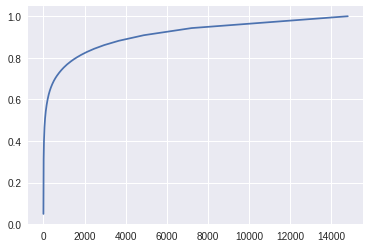

In [45]:
wc = np.array(word_count)[0]
idx = np.argsort(wc)[::-1]

percentages = np.zeros(len(wc))

for i, idx_ in enumerate(idx):
  percentages[i] = wc[idx_]

percentages_cumsum = percentages.cumsum()/percentages.sum()
# we plot the cumulative number of words over the total number of words
plt.plot(percentages_cumsum);

print(percentages_cumsum[2000])
print(percentages_cumsum[5000])

We observe that taking top 200 words we are using 80% of the corpus. If we take top 5000 words, we are representing more than 90%. 

#### Keep most common words

We can keep most common words using `max_features` argument in `CountVectorizer`. 

```
CountVectorizer(tokenizer = word_tokenize, max_features=5000))
```

**Exercise**: Change `max_features` ,  retrain the model and observe if there is any effect. 

In [0]:
# To-Do
# ...

## Stopwords

**Exercise: check again the most common words** 

What do you observe?

In [0]:
# to-do

We observe that the most frequent words are common or functional or non-content words. We can call them *stopwords*. 


**Exercise:** look into the `CountVectorizer` documentation how to include stopwords and rerun the experiments comparing the results. Questions:

- are the results better or worse than keeping stopwords?
- why do you think it's that?


In [0]:
# to-do

**Exercise:** inspect the `stopwords` vectors and analyze the words that we are removing. Do you envise any problem?


In [0]:
# to-do

**Take-home message**: It is important to analyze and think (at least 5 minutes) whether we want to keep or remove stopwords. Or maybe we want to keep some of them. Example, think of:

- language generation
- negations?


## Lemmatization and Stemming

*Stemming* consists of keeping the *root* of a word, removing inflexities. The resulting word may not belong to the vocabulary and not be a proper word. 

*Lemmatization*, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

This is useful to consider that derived words are the same. The obtained word may not exists in the vocabulary.



In [50]:
from nltk.stem import PorterStemmer, LancasterStemmer

#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print("")
print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl

Lancaster Stemmer
cat
troubl
troubl
troubl


*"**PorterStemmer** uses Suffix Stripping to produce stems. Notice how the PorterStemmer is giving the root (stem) of the word "cats" by simply removing the 's' after cat. This is a suffix added to cat to make it plural. But if you look at 'trouble', 'troubling' and 'troubled' they are stemmed to 'trouble' because *PorterStemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are applied in phases (step by step) to generate stems*. This is the reason why PorterStemmer does not often generate stems that are actual English words. It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems. It uses the rules to decide whether it is wise to strip a suffix. So Why use it? PorterStemmer is known for its simplicity and speed. "*

*"The **LancasterStemmer** (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. One table containing about 120 rules indexed by the last letter of a suffix. On each iteration, it tries to find an applicable rule by the last character of the word. Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. It also terminates if a word starts with a vowel and there are only two letters left or if a word starts with a consonant and there are only three characters left. Otherwise, the rule is applied, and the process repeats."*

In [51]:
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


#### Stemmers: Other languages

`from nltk.stem.snowball import SnowballStemmer`

In [52]:
from nltk.stem.snowball import SnowballStemmer
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [53]:
stemmer = SnowballStemmer("spanish")

print(stemmer.stem("hijos"))
print(stemmer.stem("hijas"))

print(stemmer.stem("cenó"))
print(stemmer.stem("cenamos"))

hij
hij
cen
cen


**Lemmatization**

Lemmatization needs the context of a word to work correctly. 

In [54]:
# We need to download WordNet corpora from nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 


**Exercise: add 'v' to the parameter 'pos' in `lemmatizer` and compare the results**

In [0]:
# to-do
# solution

**Exercise: do the POS tagging smarter**

Search how to obtain the POS tagging of a sentence, and use those POS in the lemmatization. 

In [0]:
# TO-DO

In [0]:
# Solution
# example: https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python

## Exercise: Using bigrams or trigrams over unigrams (words)

Use 2-grams and/or 3-grams (2/3 words) as features and compare the results with unigrams. 

In [0]:
# To-Do

## Exercise: Using TF-IDF as features

We can compute TF-IDF of each word in the corpus, and use that numeric vectors as features, instead of Number of Words. Compute tf-idf of each word in each document and compare the results vs BOW. 

In [0]:
# To-Do

## Exercise: other classification algorithms

Test other classiication algorithms (SVM, RandomForest,...) with multiple hyperparameters and compare the results. 

Note: wacht out when selecting important features, it depends on the algorithm.